### Chrome driver is a essential tool in order to extract Economical calendar data. Hence, corresponding link has provided below:
[ChromeDriver](https://googlechromelabs.github.io/chrome-for-testing/)


In [1]:
from data_scrapper import *

# date format : M/D/Y
start_date="01/01/2024"
end_date= "02/29/2024"

scpr = EconomicCalendarScrapper(chrome_driver_path=os.getenv("chrome_driver_path")) 
data = scpr.gather_economical_events(start_date=start_date,
                                end_date= end_date) # date format : M/D/Y



Opening Chrome...
Chrome is ready!
Opening URL...
URL is been opened!
Cookie consent button not found or already accepted: Message: 
Stacktrace:
0   chromedriver                        0x000000010290b184 cxxbridge1$str$ptr + 3626716
1   chromedriver                        0x00000001029039d4 cxxbridge1$str$ptr + 3596076
2   chromedriver                        0x0000000102370968 cxxbridge1$string$len + 89228
3   chromedriver                        0x00000001023b4d50 cxxbridge1$string$len + 368756
4   chromedriver                        0x00000001023ee5b4 cxxbridge1$string$len + 604376
5   chromedriver                        0x00000001023a9568 cxxbridge1$string$len + 321676
6   chromedriver                        0x00000001023aa1b8 cxxbridge1$string$len + 324828
7   chromedriver                        0x00000001028d69ac cxxbridge1$str$ptr + 3411716
8   chromedriver                        0x00000001028d9ccc cxxbridge1$str$ptr + 3424804
9   chromedriver                        0x00000001028b

In [2]:
scpr.save_data_to_csv("", data=data)

Data extracted and saved to 'economic_calendar_01-01-2024_to_02-29-2024.csv'.


In [3]:
import pandas as pd
import numpy as np

economic_calender_path = 'economic_calendar_01-01-2024_to_02-29-2024.csv'

df_events = pd.read_csv(economic_calender_path)
df_events['Datetime'] = pd.to_datetime(df_events['Datetime'], format="%A, %B %d, %Y %H:%M", errors='coerce')
df_events

,Datetime,Currency,Importance,Event,Actual,Forecast,Previous
0,2024-01-01 03:30:00,KRW,NaN,Exports (YoY) (Dec),5.1%,6.6%,7.7%
1,2024-01-01 03:30:00,KRW,NaN,Imports (YoY) (Dec),-10.8%,-11.4%,-11.6%
2,2024-01-01 03:30:00,KRW,NaN,Trade Balance (Dec),4.48B,6.26B,3.78B
3,2024-01-02 01:30:00,AUD,NaN,Judo Bank Manufacturing PMI,47.6,47.8,47.7
4,2024-01-02 03:30:00,SGD,NaN,GDP (YoY) (Q4),2.8%,NaN,1.0%
...,...,...,...,...,...,...,...
2496,2024-02-29 20:00:00,USD,NaN,4-Week Bill Auction,5.285%,NaN,5.285%
2497,2024-02-29 20:00:00,USD,NaN,8-Week Bill Auction,5.285%,NaN,5.275%
2498,2024-02-29 20:00:00,USD,NaN,Atlanta Fed GDPNow (Q1),3.0%,3.2%,3.2%
2499,2024-02-29 21:00:00,BRL,NaN,Foreign Exchange Flows,-2.317B,NaN,0.218B


In [4]:
np.where(df_events['Datetime'].isnull())

(array([], dtype=int64),)

In [5]:
# Create a new column 'Week' & 'Week_Number' representing the week period of each event
df_events['Week'] = df_events['Datetime'].dt.to_period('W')
df_events['Week_Number'] = df_events['Datetime'].dt.isocalendar().week
df_events

,Datetime,Currency,Importance,Event,Actual,Forecast,Previous,Week,Week_Number
0,2024-01-01 03:30:00,KRW,NaN,Exports (YoY) (Dec),5.1%,6.6%,7.7%,2024-01-01/2024-01-07,1
1,2024-01-01 03:30:00,KRW,NaN,Imports (YoY) (Dec),-10.8%,-11.4%,-11.6%,2024-01-01/2024-01-07,1
2,2024-01-01 03:30:00,KRW,NaN,Trade Balance (Dec),4.48B,6.26B,3.78B,2024-01-01/2024-01-07,1
3,2024-01-02 01:30:00,AUD,NaN,Judo Bank Manufacturing PMI,47.6,47.8,47.7,2024-01-01/2024-01-07,1
4,2024-01-02 03:30:00,SGD,NaN,GDP (YoY) (Q4),2.8%,NaN,1.0%,2024-01-01/2024-01-07,1
...,...,...,...,...,...,...,...,...,...
2496,2024-02-29 20:00:00,USD,NaN,4-Week Bill Auction,5.285%,NaN,5.285%,2024-02-26/2024-03-03,9
2497,2024-02-29 20:00:00,USD,NaN,8-Week Bill Auction,5.285%,NaN,5.275%,2024-02-26/2024-03-03,9
2498,2024-02-29 20:00:00,USD,NaN,Atlanta Fed GDPNow (Q1),3.0%,3.2%,3.2%,2024-02-26/2024-03-03,9
2499,2024-02-29 21:00:00,BRL,NaN,Foreign Exchange Flows,-2.317B,NaN,0.218B,2024-02-26/2024-03-03,9


### Approach: Aggretating all events' titles in each week as a unit text in order to derive each word frequency

Then find similarity between weeks relying on most used words.

In [6]:
weekly_events = df_events.groupby(['Week', 'Week_Number'])['Event'].apply(lambda events: ' '.join(events)).reset_index()
weekly_events.rename(columns={'Event': 'CombinedEvents'}, inplace=True)
weekly_events['CombinedEvents'] = weekly_events['CombinedEvents'].str.lower()
weekly_events

,Week,Week_Number,CombinedEvents
0,2024-01-01/2024-01-07,1,exports (yoy) (dec) imports (yoy) (dec) trad...
1,2024-01-08/2024-01-14,2,foreign reserves (usd) net fx reserves (usd) ...
2,2024-01-15/2024-01-21,3,m2 money stock (yoy) rightmove house price ind...
3,2024-01-22/2024-01-28,4,china loan prime rate 5y (jan) pboc loan prim...
4,2024-01-29/2024-02-04,5,exports (dec) imports (dec) trade balance (y...
5,2024-02-05/2024-02-11,6,fx reserves - usd (jan) judo bank services pm...
6,2024-02-12/2024-02-18,7,rbnz gov orr speaks ecb's lane speaks cpi (yoy...
7,2024-02-19/2024-02-25,8,performance of services index core machinery o...
8,2024-02-26/2024-03-03,9,corporate services price index (cspi) (yoy) in...


In [7]:
text_by_week = weekly_events.set_index(['Week', 'Week_Number'])['CombinedEvents']
text_by_week

Week                   Week_Number
2024-01-01/2024-01-07  1              exports (yoy)  (dec) imports (yoy)  (dec) trad...
2024-01-08/2024-01-14  2              foreign reserves (usd) net fx reserves  (usd) ...
2024-01-15/2024-01-21  3              m2 money stock (yoy) rightmove house price ind...
2024-01-22/2024-01-28  4              china loan prime rate 5y  (jan) pboc loan prim...
2024-01-29/2024-02-04  5              exports  (dec) imports  (dec) trade balance (y...
2024-02-05/2024-02-11  6              fx reserves - usd  (jan) judo bank services pm...
2024-02-12/2024-02-18  7              rbnz gov orr speaks ecb's lane speaks cpi (yoy...
2024-02-19/2024-02-25  8              performance of services index core machinery o...
2024-02-26/2024-03-03  9              corporate services price index (cspi) (yoy) in...
Name: CombinedEvents, dtype: object

In [8]:
# Build a vocabulary of all words across weeks
vocab = set()
for text in text_by_week:
    words = text.split()
    vocab.update(words)
vocab = sorted(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}

In [9]:
# Initialize a frequency matrix: [rows : weeks & columns : words]
num_weeks = len(text_by_week)
num_words = len(vocab)
freq_matrix = np.zeros((num_weeks, num_words), dtype=float)

# Fill the frequency matrix with word counts for each week
for row_idx, text in enumerate(text_by_week):
    words = text.split()
    for word in words:
        col_idx = word_to_index[word]
        freq_matrix[row_idx, col_idx] += 1

freq_matrix

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  3.,  3.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  3.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 12., ...,  1.,  0.,  1.]])

In [10]:
# Normalize each row vector (week) for cosine similarity
norms = np.linalg.norm(freq_matrix, axis=1)

# Avoid division by zero for empty vectors
norms[norms == 0] = 1  
normalized_matrix = freq_matrix / norms[:, np.newaxis]
normalized_matrix

array([[0.        , 0.00635065, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00668676, 0.00668676, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01093991, 0.        , ..., 0.        , 0.01640987,
        0.01640987],
       ...,
       [0.        , 0.00578886, 0.        , ..., 0.        , 0.        ,
        0.01736659],
       [0.        , 0.00839891, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08529968, ..., 0.00710831, 0.        ,
        0.00710831]])

In [11]:
# Compute cosine similarity matrix between all pairs of weeks
similarity_matrix = np.dot(normalized_matrix, normalized_matrix.T)
similarity_matrix

array([[1.        , 0.79414229, 0.85538244, 0.80343121, 0.65978339,
        0.71244648, 0.52306434, 0.51220996, 0.3904361 ],
       [0.79414229, 1.        , 0.90416522, 0.76581663, 0.70868953,
        0.68641155, 0.69865377, 0.58699999, 0.55892311],
       [0.85538244, 0.90416522, 1.        , 0.81957377, 0.74456153,
        0.73941868, 0.72135639, 0.60679779, 0.58311512],
       [0.80343121, 0.76581663, 0.81957377, 1.        , 0.87490415,
        0.88666519, 0.81072414, 0.82051196, 0.68241698],
       [0.65978339, 0.70868953, 0.74456153, 0.87490415, 1.        ,
        0.90405639, 0.90630986, 0.8599213 , 0.81803243],
       [0.71244648, 0.68641155, 0.73941868, 0.88666519, 0.90405639,
        1.        , 0.86213986, 0.85652713, 0.70113379],
       [0.52306434, 0.69865377, 0.72135639, 0.81072414, 0.90630986,
        0.86213986, 1.        , 0.88474121, 0.86190727],
       [0.51220996, 0.58699999, 0.60679779, 0.82051196, 0.8599213 ,
        0.85652713, 0.88474121, 1.        , 0.81624649],


In [12]:
weeks = text_by_week.index.tolist()

for i, week in enumerate(weeks):
    # Get similarity scores for the current week
    sim_scores = similarity_matrix[i]
    
    # Sort indices of other weeks by similarity in descending order
    similar_indices = np.argsort(-sim_scores)
    
    # Exclude the first entry as it's the week itself
    top_indices = similar_indices[1:4]
    
    # Retrieve corresponding week labels
    similar_weeks = [weeks[idx] for idx in top_indices]
    
    print(f"Week {week}: similar to weeks {similar_weeks}")

Week (Period('2024-01-01/2024-01-07', 'W-SUN'), 1): similar to weeks [(Period('2024-01-15/2024-01-21', 'W-SUN'), 3), (Period('2024-01-22/2024-01-28', 'W-SUN'), 4), (Period('2024-01-08/2024-01-14', 'W-SUN'), 2)]
Week (Period('2024-01-08/2024-01-14', 'W-SUN'), 2): similar to weeks [(Period('2024-01-15/2024-01-21', 'W-SUN'), 3), (Period('2024-01-01/2024-01-07', 'W-SUN'), 1), (Period('2024-01-22/2024-01-28', 'W-SUN'), 4)]
Week (Period('2024-01-15/2024-01-21', 'W-SUN'), 3): similar to weeks [(Period('2024-01-08/2024-01-14', 'W-SUN'), 2), (Period('2024-01-01/2024-01-07', 'W-SUN'), 1), (Period('2024-01-22/2024-01-28', 'W-SUN'), 4)]
Week (Period('2024-01-22/2024-01-28', 'W-SUN'), 4): similar to weeks [(Period('2024-02-05/2024-02-11', 'W-SUN'), 6), (Period('2024-01-29/2024-02-04', 'W-SUN'), 5), (Period('2024-02-19/2024-02-25', 'W-SUN'), 8)]
Week (Period('2024-01-29/2024-02-04', 'W-SUN'), 5): similar to weeks [(Period('2024-02-12/2024-02-18', 'W-SUN'), 7), (Period('2024-02-05/2024-02-11', 'W-SUN

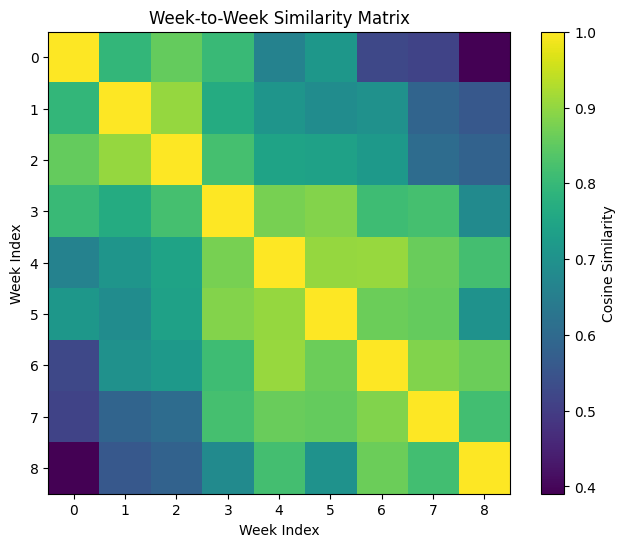

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Week-to-Week Similarity Matrix')
plt.xlabel('Week Index')
plt.ylabel('Week Index')
plt.show()

### Let's jump into the Gold price OHLC data
#### Note that the period of the data is Jabuary & February, 2024 , as it was in calendar data interval.

In [14]:
candle_data_gold_path_january_2024 = "DAT_MT_XAUUSD_M1_202401.csv"
candle_data_gold_path_february_2024 = "DAT_MT_XAUUSD_M1_202402.csv"

column_names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Junk']

df_jan = pd.read_csv(candle_data_gold_path_january_2024, header=None, names=column_names)
df_feb = pd.read_csv(candle_data_gold_path_february_2024, header=None, names=column_names)

df_gold = pd.concat([df_jan, df_feb], ignore_index=True)
df_gold = df_gold.drop(columns='Junk')

# Combine 'Date' and 'Time' columns and then, convert to a datetime object
df_gold['Datetime'] = pd.to_datetime(df_gold['Date'] + ' ' + df_gold['Time'], format='%Y.%m.%d %H:%M')

df_gold = df_gold.sort_values(by='Datetime')
df_gold

,Date,Time,Open,High,Low,Close,Datetime
2608,2024.01.01,18:00,2062.598,2064.525,2062.405,2064.235,2024-01-01 18:00:00
2609,2024.01.01,18:01,2063.795,2064.135,2063.435,2064.125,2024-01-01 18:01:00
2610,2024.01.01,18:02,2064.145,2064.165,2063.905,2063.995,2024-01-01 18:02:00
2611,2024.01.01,18:03,2063.995,2065.526,2063.894,2064.025,2024-01-01 18:03:00
2612,2024.01.01,18:04,2063.925,2066.595,2063.925,2065.214,2024-01-01 18:04:00
...,...,...,...,...,...,...,...
37219,2024.02.29,23:55,2045.215,2045.375,2045.175,2045.325,2024-02-29 23:55:00
37220,2024.02.29,23:56,2045.315,2045.315,2045.255,2045.315,2024-02-29 23:56:00
37221,2024.02.29,23:57,2045.335,2045.365,2045.335,2045.355,2024-02-29 23:57:00
37222,2024.02.29,23:58,2045.405,2045.515,2045.405,2045.425,2024-02-29 23:58:00


In [15]:
# Create a 'Week' & 'Week_Number' column representing the weekly period
df_gold['Week'] = df_gold['Datetime'].dt.to_period('W')
df_gold['Week_Number'] = df_gold['Datetime'].dt.isocalendar().week
df_gold

,Date,Time,Open,High,Low,Close,Datetime,Week,Week_Number
2608,2024.01.01,18:00,2062.598,2064.525,2062.405,2064.235,2024-01-01 18:00:00,2024-01-01/2024-01-07,1
2609,2024.01.01,18:01,2063.795,2064.135,2063.435,2064.125,2024-01-01 18:01:00,2024-01-01/2024-01-07,1
2610,2024.01.01,18:02,2064.145,2064.165,2063.905,2063.995,2024-01-01 18:02:00,2024-01-01/2024-01-07,1
2611,2024.01.01,18:03,2063.995,2065.526,2063.894,2064.025,2024-01-01 18:03:00,2024-01-01/2024-01-07,1
2612,2024.01.01,18:04,2063.925,2066.595,2063.925,2065.214,2024-01-01 18:04:00,2024-01-01/2024-01-07,1
...,...,...,...,...,...,...,...,...,...
37219,2024.02.29,23:55,2045.215,2045.375,2045.175,2045.325,2024-02-29 23:55:00,2024-02-26/2024-03-03,9
37220,2024.02.29,23:56,2045.315,2045.315,2045.255,2045.315,2024-02-29 23:56:00,2024-02-26/2024-03-03,9
37221,2024.02.29,23:57,2045.335,2045.365,2045.335,2045.355,2024-02-29 23:57:00,2024-02-26/2024-03-03,9
37222,2024.02.29,23:58,2045.405,2045.515,2045.405,2045.425,2024-02-29 23:58:00,2024-02-26/2024-03-03,9


In [16]:
# Constructing weekly_summary
weekly_summary = df_gold.groupby(['Week', 'Week_Number']).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
}).reset_index()

weekly_summary["Return"] = (weekly_summary["Close"] / weekly_summary["Open"]) - 1
weekly_summary

,Week,Week_Number,Open,High,Low,Close,Return
0,2024-01-01/2024-01-07,1,2062.598,2078.825,2024.255,2035.715,-0.013034
1,2024-01-08/2024-01-14,2,2035.665,2062.145,2013.225,2054.235,0.009122
2,2024-01-15/2024-01-21,3,2054.215,2058.505,2001.755,2025.405,-0.014025
3,2024-01-22/2024-01-28,4,2025.335,2037.808,2009.455,2026.185,0.000420
4,2024-01-29/2024-02-04,5,2026.205,2065.348,2020.485,2031.825,0.002774
5,2024-02-05/2024-02-11,6,2031.785,2044.465,2014.835,2023.075,-0.004287
6,2024-02-12/2024-02-18,7,2023.105,2032.845,1984.088,2018.985,-0.002036
7,2024-02-19/2024-02-25,8,2018.985,2041.285,2013.185,2032.038,0.006465
8,2024-02-26/2024-03-03,9,2032.095,2050.605,2024.355,2045.425,0.006560


In [17]:
weekly_summary.to_csv('gold_prices_weekly_summary.csv', index=False)

In [ ]:
merged_data = pd.merge(weekly_events[['Week', 'Week_Number', 'Cluster']], 
                       weekly_summary, on='Week_Number', how='inner')
merged_data